In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
import matplotlib.pyplot as plt
# below code for to engore the warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
X1,y1 = make_regression(n_samples=300, n_features=1, n_targets=1, noise=50)

In [10]:
df = pd.DataFrame({'feature1':X1[:,0],'target':y1})

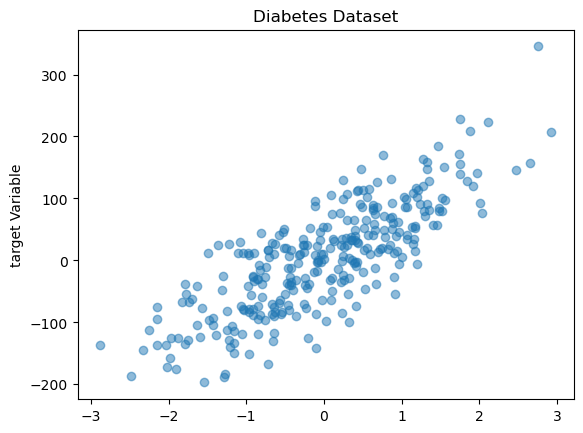

In [12]:
# Plotting the graph of dataset
plt.scatter(X1,y1,alpha=0.5)
plt.ylabel("target Variable")
plt.title("Diabetes Dataset")
plt.show()

In [13]:
X1.shape

(300, 1)

In [14]:
y1.shape

(300,)

In [15]:
lr = LinearRegression()
la = Lasso(alpha=0.01)
ri = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.005)

In [16]:
estimators = [('lr',lr),('la',la),('ri',ri),('en',en)]

In [17]:
for estimator in estimators:
    scores = cross_val_score(estimator[1],X1,y1,scoring='r2',cv=10)
    print(estimator[0],np.mean(scores),2)

lr 0.630406456869342 2
la 0.6304086837173981 2
ri 0.6304122335568032 2
en 0.630442843417668 2


In [18]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,X1,y1,scoring='r2',cv=10)
print("Voting Regressor: ",np.mean(scores),2)

Voting Regressor:  0.6304181505917377 2


In [22]:
# for i in range(1,4):
#     for j in range(1,4):
#         for k in range(1,4):
#              for p in range(1,4):
#                 vr = VotingRegressor(estimators,weights=[i,j,k,p])
#                 scores = cross_val_score(vr, X1,y1,cv=10)
#                 print("for i={},j={},k={},p={}".format(i,j,k,p),np.round(np.mean(scores),2))